# GLASS KNN 
## (predict the glass type)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## Type of glass:
### 1=building windows float processed 
### 2=building windows non float processed 
### 3=vehicle windows float processed 
### 4=containers  
### 5=tableware

In [4]:
df = pd.read_csv('D:/ML_Pyton_course/ML_Python/labs/datasets/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.542056
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,1.707648
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,6.000000


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
X=df.iloc[0: ,0:9 ]
y=df.Type

In [33]:
#print(X)
#print(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=4,test_size = 0.25)

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


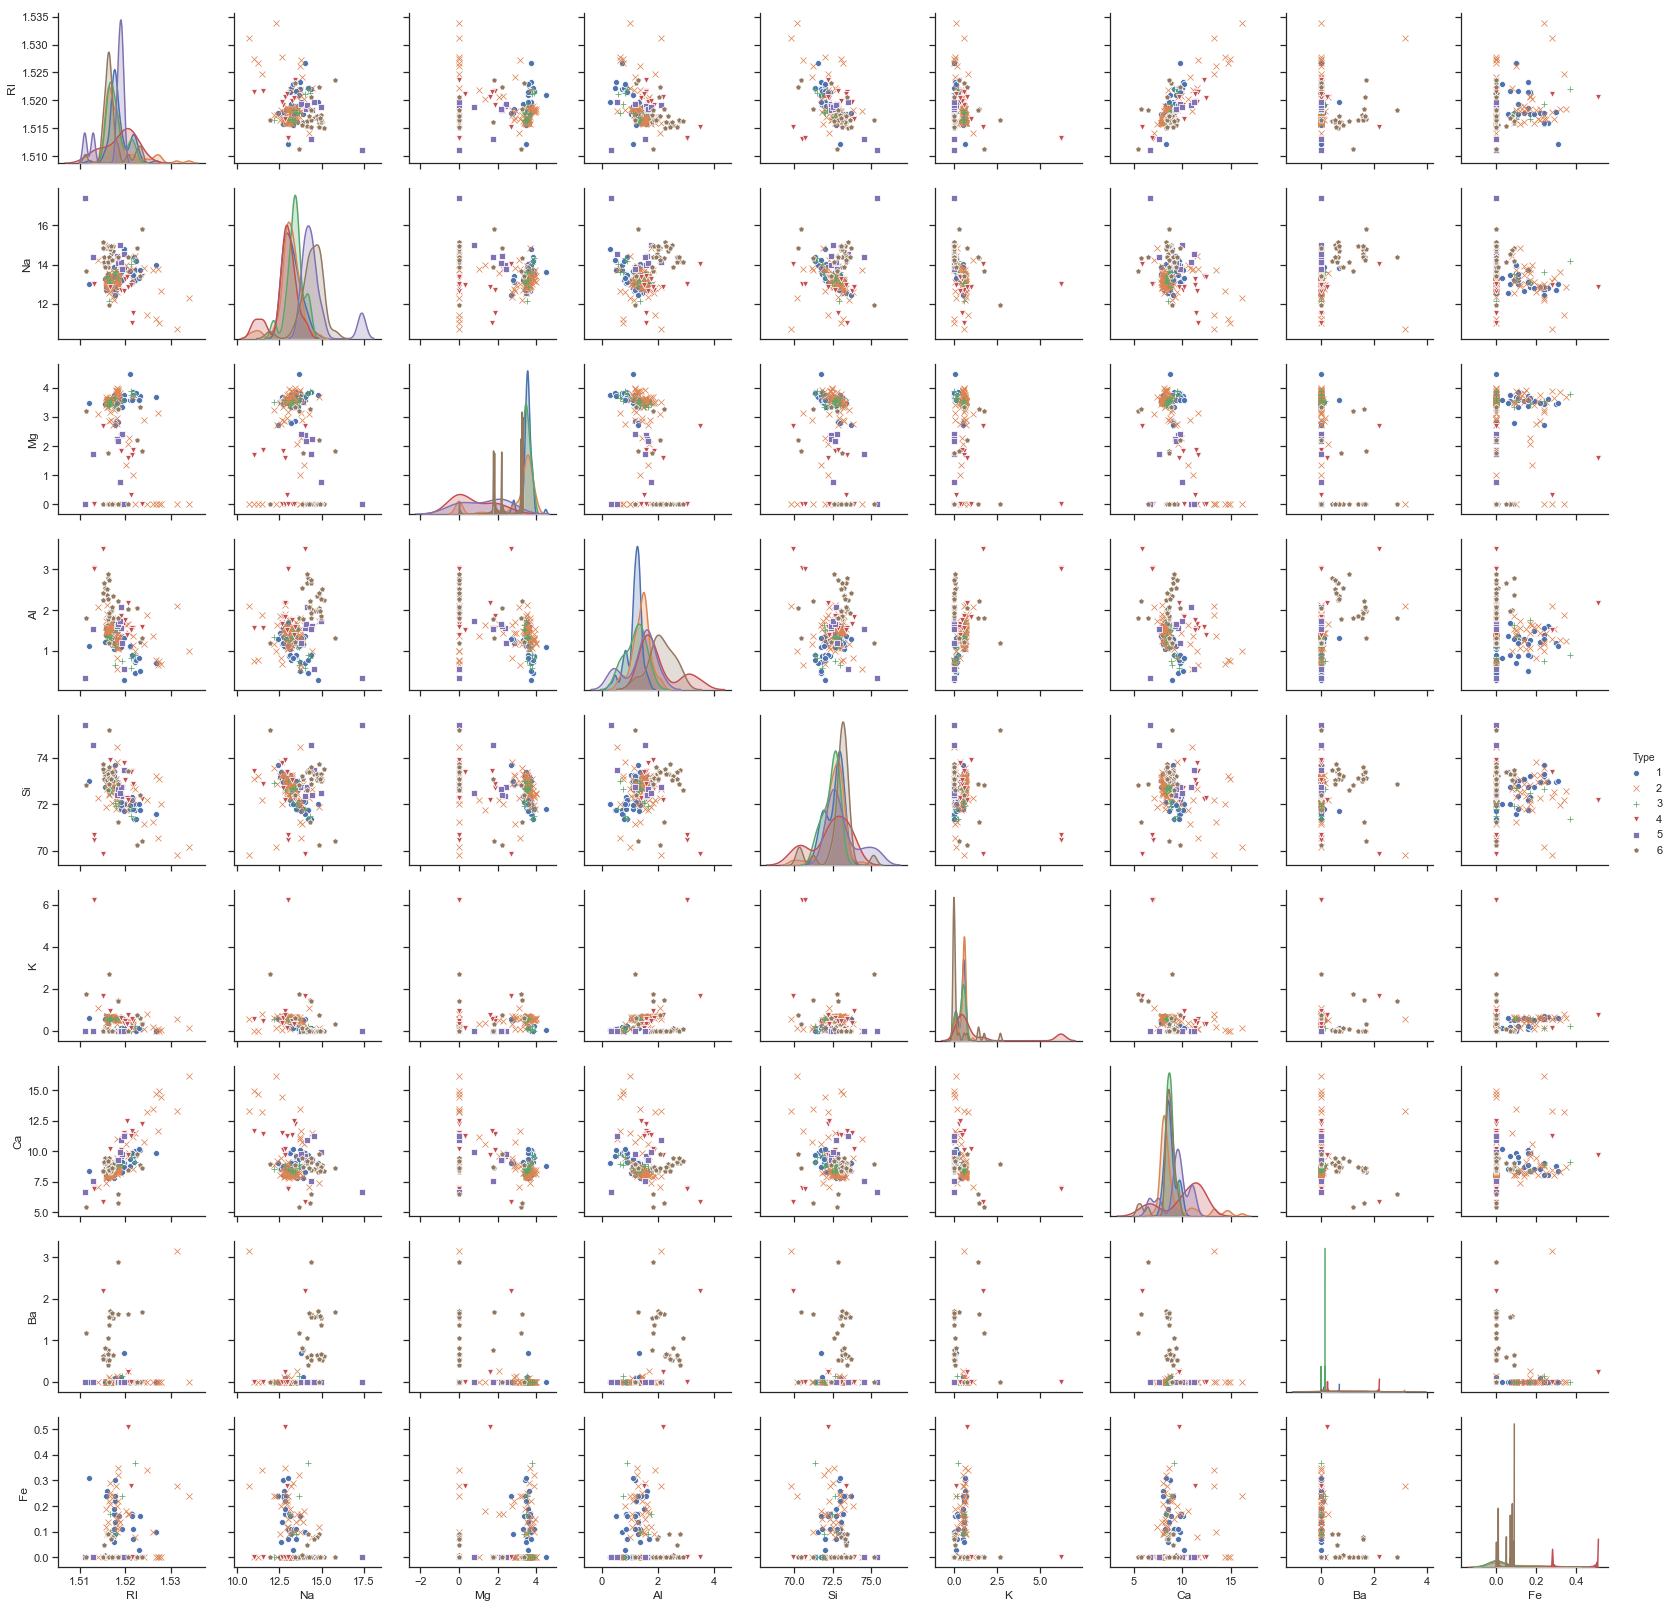

In [10]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, 
                 hue = 'Type',
                 vars=['RI',
                       'Na',
                       'Mg',
                       'Al',
                       'Si',
                       'K',
                       'Ca',
                       'Ba',
                       'Fe',
                      ],
#                  palette=sns.hls_palette(6, l=.6, s=.8),
                 markers=['o','x','+','v','s','p'])


### normalized features
#### The standard score of a sample x is calculated as:
#### z = (x - u) / s
#### where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if 
#### with_std=False.

In [11]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [13]:
print(X_train)

[[-1.42975939  1.16574801  0.25735738 ... -1.42465306 -0.3255152
  -0.58756888]
 [-1.72660692 -0.4979426  -1.94360247 ... -1.53919419 -0.3255152
  -0.58756888]
 [-0.82257126 -0.6576569   0.49953419 ... -0.68395374 -0.3255152
   1.82297013]
 ...
 [ 0.45927036  1.57834328 -1.94360247 ...  1.73668219 -0.3255152
  -0.58756888]
 [ 0.75949115 -0.69758547 -0.79682404 ...  0.57599872  0.16699007
   4.53482652]
 [-0.49199105 -0.19182353  0.57788551 ... -0.64577336 -0.3255152
  -0.58756888]]


In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
test_data = [1.51514,  14.85,  0.00,  2.42,  73.72,  0.00,  8.39,  0.56,  0.00]
knn.predict([test_data])

array([6], dtype=int64)

In [17]:
y_pred = knn.predict(X_test)
(y_pred != y_test).sum()

11

In [18]:
knn.score(X_test,y_test)

0.7962962962962963